In [187]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('drive/MyDrive/boston_data.csv')
print(data.shape)
print(data.describe())

(404, 14)
             crim          zn       indus        chas         nox         rm  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.00000   
mean     3.730912   10.509901   11.189901    0.069307    0.556710    6.30145   
std      8.943922   22.053733    6.814909    0.254290    0.117321    0.67583   
min      0.006320    0.000000    0.460000    0.000000    0.392000    3.56100   
25%      0.082382    0.000000    5.190000    0.000000    0.453000    5.90275   
50%      0.253715    0.000000    9.795000    0.000000    0.538000    6.23050   
75%      4.053158   12.500000   18.100000    0.000000    0.631000    6.62925   
max     88.976200   95.000000   27.740000    1.000000    0.871000    8.78000   

              age         dis         rad         tax     ptratio       black  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    68.601733    3.799666    9.836634  411.688119   18.444554  355.068243   
std     28.066143    2.109

In [212]:
print(data.isnull().any())
data = data.fillna(data.mean())

crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
black      False
lstat      False
medv       False
dtype: bool


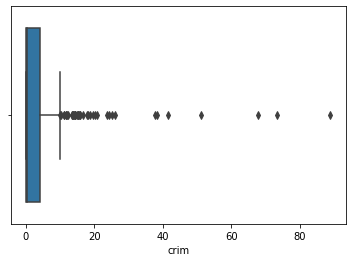

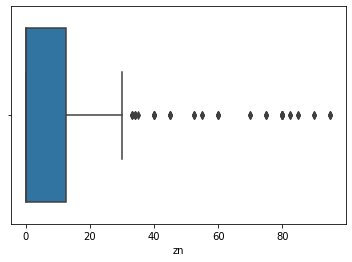

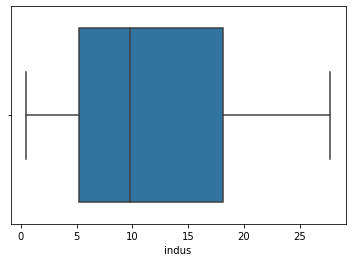

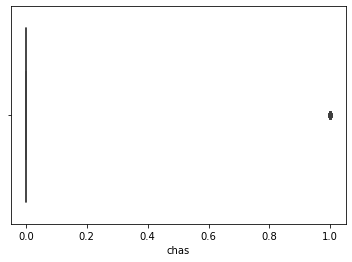

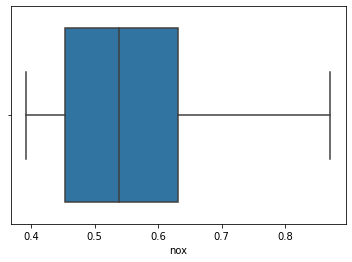

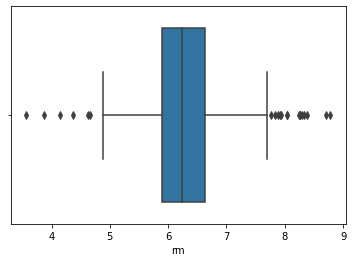

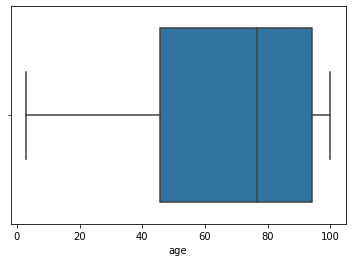

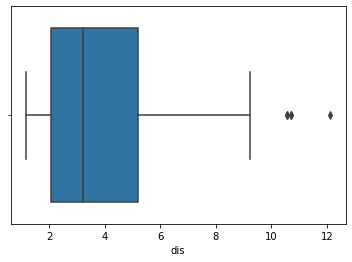

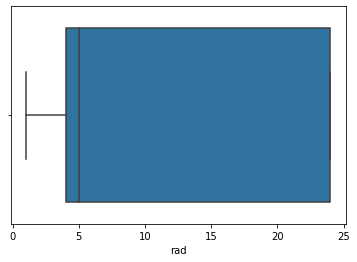

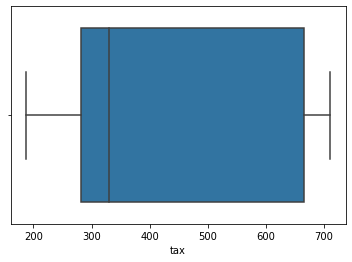

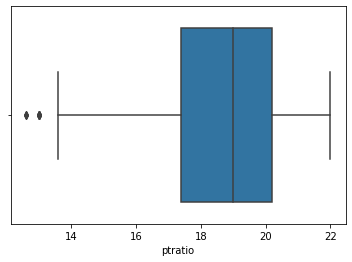

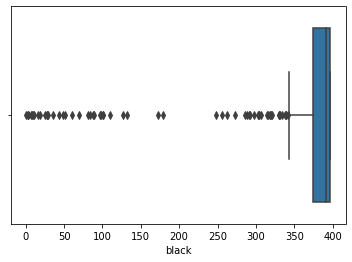

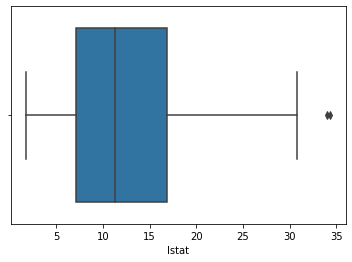

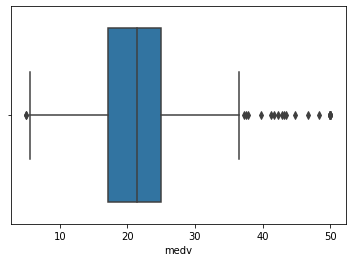

In [190]:
for col in data.columns:
    plt.figure()
    sns.boxplot(x=data[col])

In [191]:
for col in data.columns:
  #if(col!="chas"):
    q25 = data[col].quantile(0.25)
    q75 = data[col].quantile(0.75)
    iqr = q75 - q25
    data = data[(data[col] >= q25 - 1.5 * iqr) & (data[col] <= q75 + 1.5 * iqr)]

In [192]:
print(data.shape)

(182, 14)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see th

<Figure size 432x288 with 0 Axes>

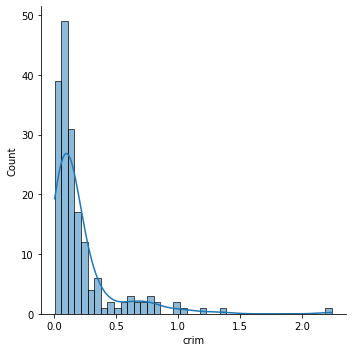

<Figure size 432x288 with 0 Axes>

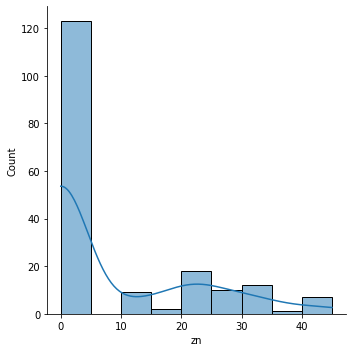

<Figure size 432x288 with 0 Axes>

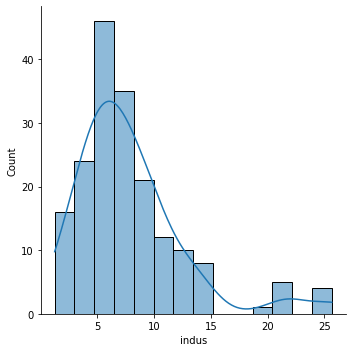

<Figure size 432x288 with 0 Axes>

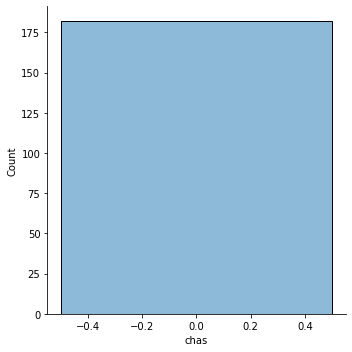

<Figure size 432x288 with 0 Axes>

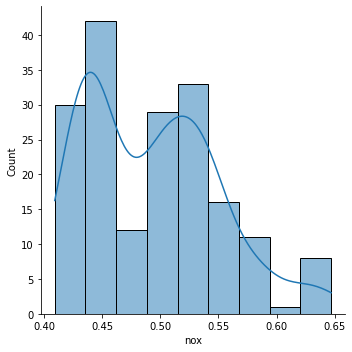

<Figure size 432x288 with 0 Axes>

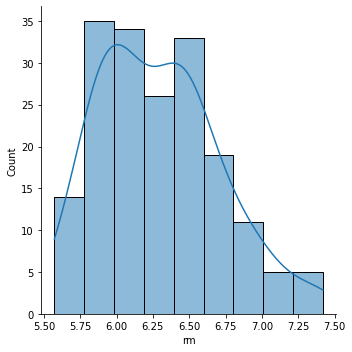

<Figure size 432x288 with 0 Axes>

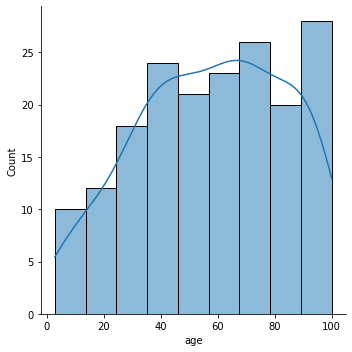

<Figure size 432x288 with 0 Axes>

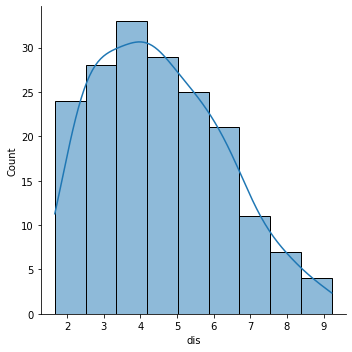

<Figure size 432x288 with 0 Axes>

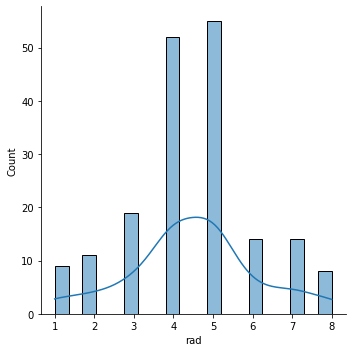

<Figure size 432x288 with 0 Axes>

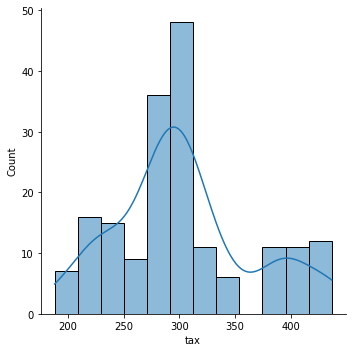

<Figure size 432x288 with 0 Axes>

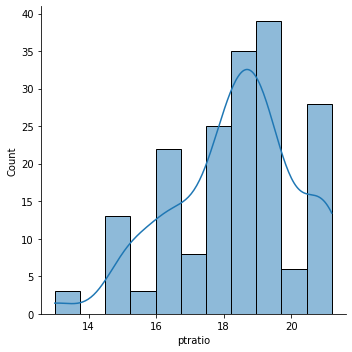

<Figure size 432x288 with 0 Axes>

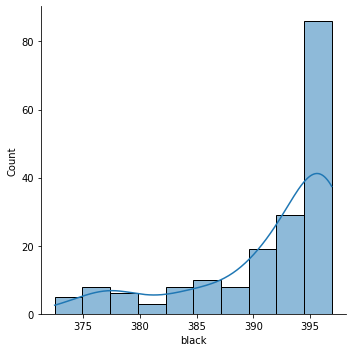

<Figure size 432x288 with 0 Axes>

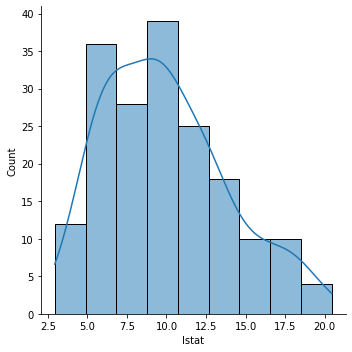

<Figure size 432x288 with 0 Axes>

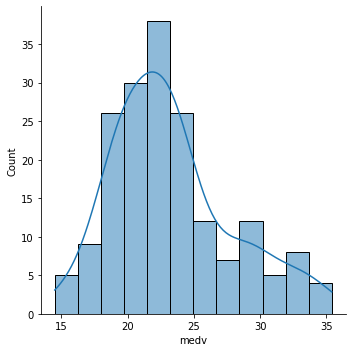

In [193]:
for col in data.columns:
    plt.figure()
    sns.displot(data[col], kde=True)

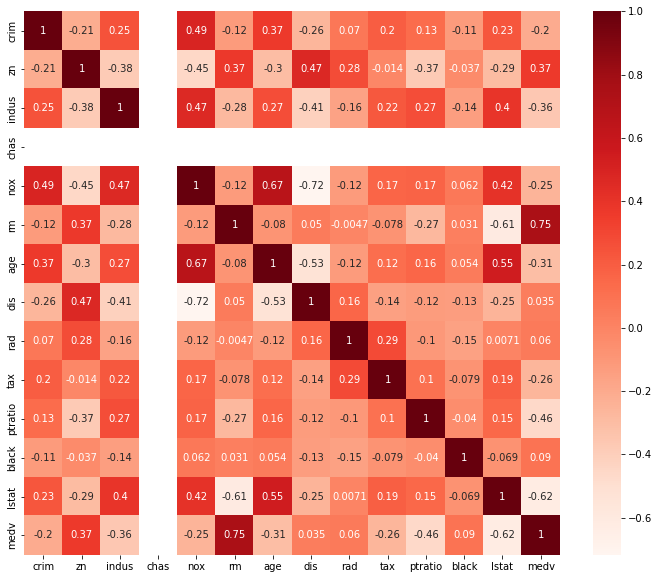

In [194]:
corr = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)


In [195]:
data = data.drop(columns="age")
data = data.drop(columns="nox")
#data = data.drop(columns="rad")
#data = data.drop(columns="dis")

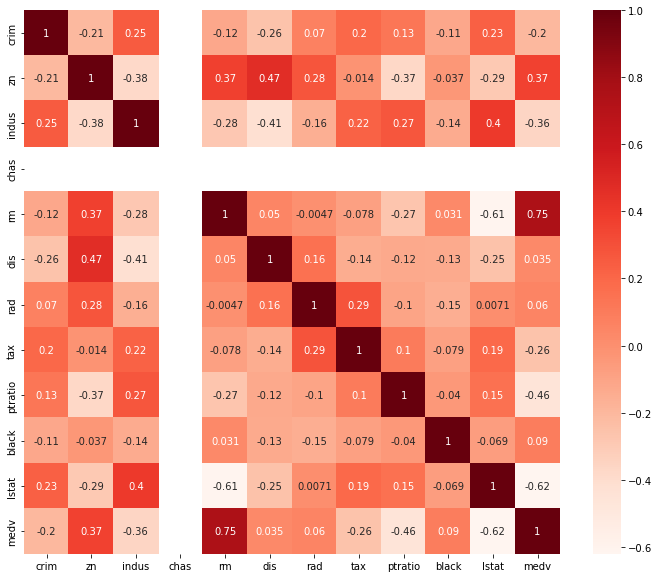

In [196]:
corr = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)

In [197]:
data.head(10)

,crim,zn,indus,chas,rm,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,5.961,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,5.927,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,5.972,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
4,0.04337,21.0,5.64,0.0,6.115,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
5,0.08370,45.0,3.44,0.0,7.185,4.5667,5.0,398.0,15.2,396.90,5.39,34.9
6,0.19073,22.0,5.86,0.0,6.718,7.8265,7.0,330.0,19.1,393.74,6.56,26.2
7,0.26938,0.0,9.90,0.0,6.266,3.2628,4.0,304.0,18.4,393.39,7.90,21.6
11,0.09252,30.0,4.93,0.0,6.606,6.1899,6.0,300.0,16.6,383.78,7.37,23.3
12,1.00245,0.0,8.14,0.0,6.674,4.2390,4.0,307.0,21.0,380.23,11.98,21.0
13,0.11027,25.0,5.13,0.0,6.456,7.2255,8.0,284.0,19.7,396.90,6.73,22.2


In [198]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [199]:
from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper([(data.columns, MinMaxScaler())])
minmax_features = mapper.fit_transform(data.copy(), data.columns.size)
minmax_features_df = pd.DataFrame(minmax_features, index=data.index, columns=data.columns)
pd.isnull(minmax_features_df).any()

crim       False
zn         False
indus      False
chas       False
rm         False
dis        False
rad        False
tax        False
ptratio    False
black      False
lstat      False
medv       False
dtype: bool

In [200]:
minmax_features_df.shape

(182, 12)

In [201]:
minmax_features_df.head(10)

,crim,zn,indus,chas,rm,dis,rad,tax,ptratio,black,lstat,medv
0,0.068174,0.000000,0.391803,0.0,0.210498,0.479018,0.428571,0.469880,0.756098,0.182302,0.396345,0.344498
1,0.043362,0.555556,0.159016,0.0,0.192100,0.696738,1.000000,0.385542,0.817073,1.000000,0.358652,0.244019
2,0.153432,0.000000,0.354508,0.0,0.216450,0.189802,0.428571,0.465863,0.658537,0.972962,0.401485,0.277512
4,0.016569,0.466667,0.179918,0.0,0.293831,0.681210,0.428571,0.220884,0.463415,0.879967,0.370645,0.287081
5,0.034606,1.000000,0.089754,0.0,0.872835,0.383628,0.571429,0.843373,0.268293,1.000000,0.139920,0.976077
6,0.082472,0.488889,0.188934,0.0,0.620130,0.815149,0.857143,0.570281,0.743902,0.870545,0.206739,0.559809
7,0.117645,0.000000,0.354508,0.0,0.375541,0.211022,0.428571,0.465863,0.658537,0.856206,0.283267,0.339713
11,0.038550,0.666667,0.150820,0.0,0.559524,0.598501,0.714286,0.449799,0.439024,0.462515,0.252998,0.421053
12,0.445488,0.000000,0.282377,0.0,0.596320,0.340248,0.428571,0.477912,0.975610,0.317083,0.516276,0.311005
13,0.046488,0.555556,0.159016,0.0,0.478355,0.735591,1.000000,0.385542,0.817073,1.000000,0.216448,0.368421


In [202]:
y=minmax_features_df['medv']
X=minmax_features_df.drop(columns='medv')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [203]:
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred, squared=True))
print(cross_val_score(linear, X, y, cv=5, scoring='neg_mean_squared_error').mean())

Test MSE = 0.0193
-0.01503773317790218


In [204]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred, squared=True))
print(cross_val_score(ridge, X, y, cv=5, scoring='neg_mean_squared_error').mean())

Test MSE = 0.0186
-0.014850053838117439


In [205]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred, squared=True))
print(cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_squared_error').mean())

Test MSE = 0.0611
-0.04708386709933408


In [206]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred, squared=True))
print(cross_val_score(gb, X, y, cv=5, scoring='neg_mean_squared_error').mean())

Test MSE = 0.0131
-0.011958801849133423


In [207]:
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred, squared=True))
print(cross_val_score(dt, X, y, cv=5, scoring='neg_mean_squared_error').mean())

Test MSE = 0.0304
-0.023979148444018755


In [208]:
poly = PolynomialFeatures(degree=5)
x_poly_train = poly.fit_transform(X_train)
x_poly_test = poly.fit_transform(X_test)
lin_poly = Ridge()
lin_poly.fit(x_poly_train, y_train)
y_pred = lin_poly.predict(x_poly_test)
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred, squared=True))
print(cross_val_score(lin_poly, X, y, cv=5, scoring='neg_mean_squared_error').mean())

Test MSE = 0.0178
-0.014850053838117439


In [209]:
dataTest = pd.read_csv('drive/MyDrive/boston_test_data.csv')
print(dataTest.shape)
print(dataTest.describe())

(102, 13)
             crim          zn       indus        chas         nox          rm  \
count  102.000000  102.000000  102.000000  102.000000  102.000000  102.000000   
mean     3.050534   14.745098   10.926373    0.068627    0.546713    6.218029   
std      7.068744   27.650824    7.067821    0.254068    0.110170    0.800174   
min      0.009060    0.000000    1.220000    0.000000    0.385000    4.138000   
25%      0.079613    0.000000    4.950000    0.000000    0.447000    5.819000   
50%      0.263765    0.000000    8.560000    0.000000    0.538000    6.034000   
75%      1.757370   20.000000   18.100000    0.000000    0.624000    6.477500   
max     45.746100  100.000000   27.740000    1.000000    0.871000    8.725000   

              age         dis         rad         tax     ptratio       black  \
count  102.000000  102.000000  102.000000  102.000000  102.000000  102.000000   
mean    68.468627    3.776729    8.411765  394.568627   18.499020  363.034216   
std     28.613692

In [210]:
dataTest = dataTest.drop(columns="age")
dataTest = dataTest.drop(columns="nox")
#dataTest = dataTest.drop(columns="rad")
#dataTest = dataTest.drop(columns="dis")
mapperTest = DataFrameMapper([(dataTest.columns, MinMaxScaler())])
minmax_featuresTest = mapperTest.fit_transform(dataTest.copy(), dataTest.columns.size)
minmax_features_df_Test = pd.DataFrame(minmax_featuresTest, index=dataTest.index, columns=dataTest.columns)
#pd.isnull(minmax_features_df_Test).any()
gb.predict(minmax_features_df_Test)

array([0.68302021, 0.41879516, 0.31774286, 0.42222643, 0.43852522,
       0.43623399, 0.31181539, 0.34442453, 0.29398425, 0.78338983,
       0.86453889, 0.2266262 , 0.26765487, 0.68022285, 0.36261533,
       0.29195406, 0.40054843, 0.31314579, 0.48316848, 0.16375602,
       0.41492167, 0.63151511, 0.20341891, 0.26038705, 0.40130337,
       0.38760474, 0.67855721, 0.30982279, 0.31731079, 1.02880724,
       0.36583867, 0.13782306, 0.44630329, 0.33382173, 0.29359113,
       0.37538521, 0.46812217, 0.78641616, 0.38489052, 0.41724431,
       0.25059957, 1.0107295 , 0.36801665, 0.33178177, 0.50140651,
       0.53986149, 0.34045286, 0.38331539, 0.34740773, 0.32532379,
       0.42688289, 0.27723296, 0.45387877, 0.23173055, 0.57578842,
       0.37684485, 0.32744104, 0.39675293, 0.45723231, 0.3800601 ,
       0.89950081, 0.30864599, 0.33647946, 0.42331182, 0.55833508,
       0.12951339, 0.3291332 , 0.48082444, 0.53403701, 0.26784101,
       0.75411276, 0.33220574, 0.34209729, 0.52028868, 0.33710